In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import datetime

In [4]:
from ecg_core.ecg_main_services import preprocessing
from ecg_core.ecg_main_services import save_splited_ecg, read_splited_ecg

Using TensorFlow backend.


In [5]:
import tensorflow as tf

In [6]:
tf.__version__

'1.15.0'

In [7]:
from ecg_core.ecg_main_services import load_model_classification, predict_class

## Preprocessing

In [8]:
ECG_Split_250 = preprocessing("record_04015_AF_N.csv", path="static\csv-upload", fs=250)

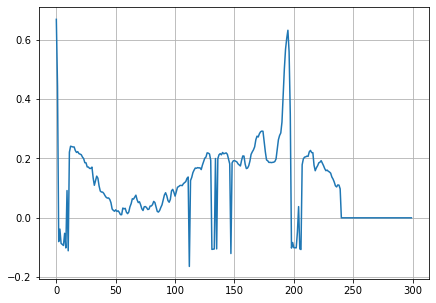

In [9]:
plt.figure(figsize=(7,5))
plt.plot(ECG_Split_250[0])
plt.grid()

In [10]:
from ecg_core.ecg_read_from_csv import read_from_csv
from ecg_core.ecg_baseline_als import remove_baseline_als
from ecg_core.ecg_normalizarion import min_max_normalization, scaler
from ecg_core.ecg_rr_detection import rr_detector
from ecg_core.ecg_upsampling_signals import upsampling_signals

In [83]:
ECG = read_from_csv("record_04015_AF_N.csv", path="static\csv-upload", fs=250)

In [84]:
ECG.head(10)

,ECG
Idx_Time,
2020-12-30 09:06:00.004,-0.995
2020-12-30 09:06:00.008,-1.030
2020-12-30 09:06:00.012,-2.000
2020-12-30 09:06:00.016,-2.000
2020-12-30 09:06:00.020,-2.000
2020-12-30 09:06:00.024,-2.000
2020-12-30 09:06:00.028,-2.000
2020-12-30 09:06:00.032,-1.000
2020-12-30 09:06:00.036,-0.915


In [85]:
ECG = ECG.iloc[::2]

In [86]:
ECG.head(10)

,ECG
Idx_Time,
2020-12-30 09:06:00.004,-0.995
2020-12-30 09:06:00.012,-2.000
2020-12-30 09:06:00.020,-2.000
2020-12-30 09:06:00.028,-2.000
2020-12-30 09:06:00.036,-0.915
2020-12-30 09:06:00.044,-0.905
2020-12-30 09:06:00.052,-0.910
2020-12-30 09:06:00.060,-0.720
2020-12-30 09:06:00.068,-0.590


09:06:00.004000 09:06:16.004000


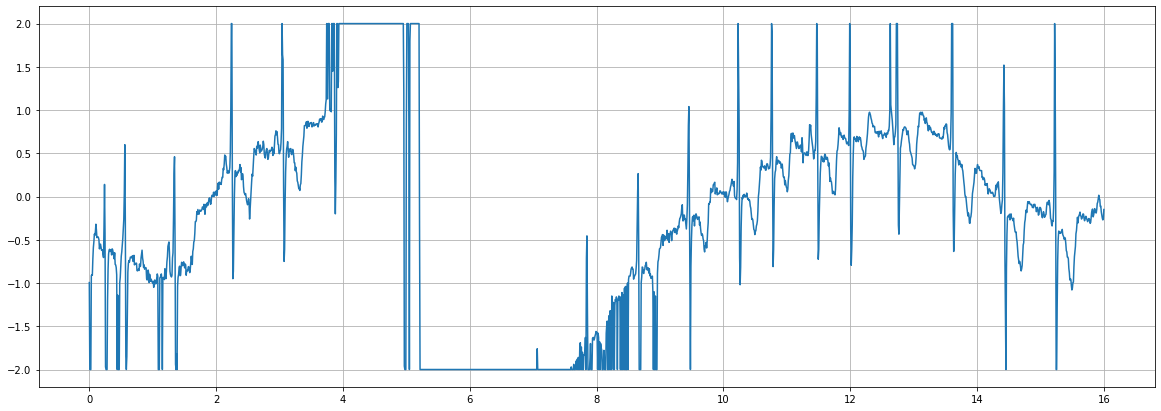

In [87]:
fs = 125

start = ECG.index[0].time()
end = (ECG.index[0] + datetime.timedelta(seconds=16)).time()
print(start, end)

data = ECG.between_time(start,end)
time = np.arange(data.shape[0]) / fs
plt.figure(figsize=(20,7))
plt.plot(time, data)
plt.grid()

In [88]:
ECG_ALS = remove_baseline_als(ECG)

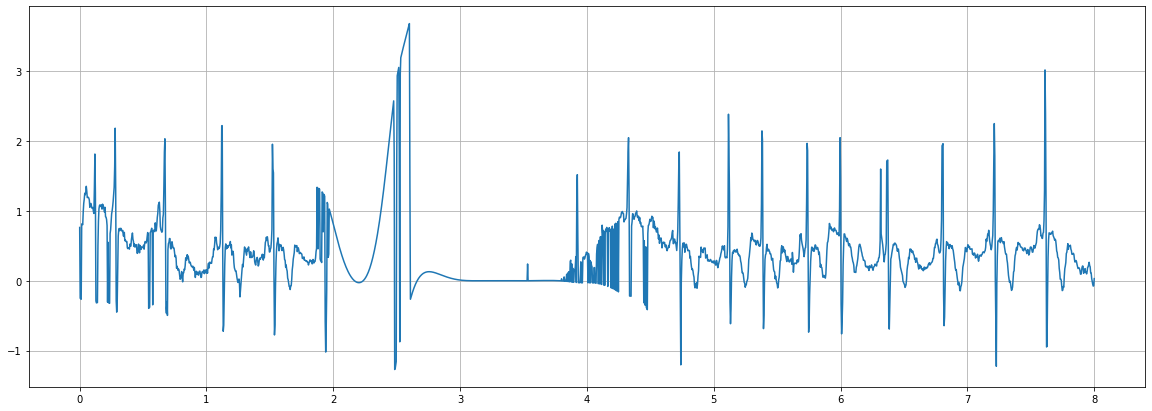

In [89]:
fs = 250
data = ECG_ALS[0]
time = np.arange(data.shape[0]) / fs
plt.figure(figsize=(20,7))
plt.plot(time, data)
plt.grid()

In [90]:
ECG_Norm = min_max_normalization(ECG_ALS)

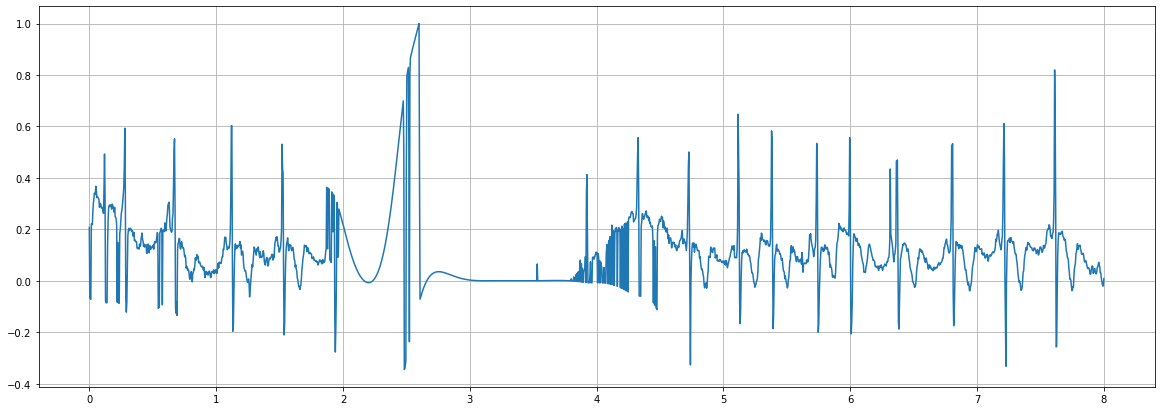

In [91]:
fs = 250
data = ECG_Norm[0]
time = np.arange(data.shape[0]) / fs
plt.figure(figsize=(20,7))
plt.plot(time, data)
plt.grid()

In [92]:
ECG_split = rr_detector(ECG_Norm, fs)

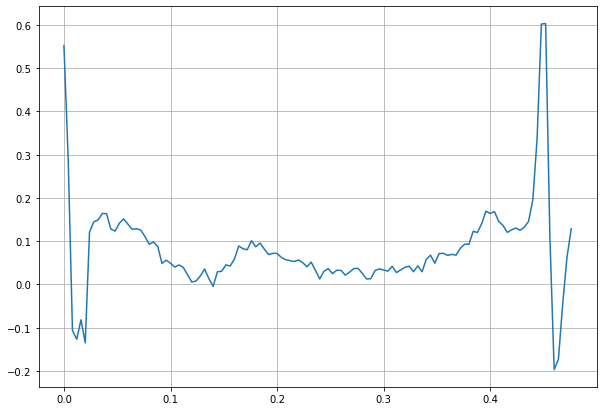

In [93]:
fs = 250
data = ECG_split[0]
time = np.arange(data.shape[0]) / fs
plt.figure(figsize=(10,7))
plt.plot(time, data)
plt.grid()

In [ ]:
ECG_Split_250 = upsampling_signals(ECG_split, fs)

In [ ]:
def preprocessing(filename, path, fs):
    ECG = read_from_csv(filename, path, fs)
    ECG_ALS = remove_baseline_als(ECG)
    ECG_Norm = min_max_normalization(ECG_ALS)
    ECG_split = rr_detector(ECG_Norm, fs)
    ECG_Split_250 = upsampling_signals(ECG_split, fs)
    #ECG_Scaler = scaler(ECG_Split_250)
    return ECG_Split_250

In [8]:
save_splited_ecg(ECG_Split_250, "ecg_split_002.csv", path="static\csv-upload")

In [9]:
ECG_DF = read_splited_ecg("ecg_split_002.csv", path="static\csv-upload")

In [23]:
ECG_DF.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.498502,0.607939,1.000000,0.669057,0.428454,0.127460,-0.049463,-0.213072,-0.211191,-0.083823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.539907,0.610677,0.964063,0.969614,0.579622,0.290683,0.027406,-0.242551,-0.239397,-0.236851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.360429,0.457160,0.882690,0.660614,0.893351,0.753635,0.610445,0.328422,0.070501,-0.317130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.382571,0.492754,0.874880,0.880050,0.884937,0.563530,0.278653,-0.000493,-0.132501,-0.151248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.604112,0.350256,-0.177662,-0.084807,-0.164609,-0.158774,-0.153413,-0.148517,0.157305,0.221320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Load model & Predict

In [12]:
cnn_model = load_model_classification("cnn_lms_model.h5", path="static\model-upload")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [13]:
X_data = ECG_DF.iloc[:,:300].values

In [14]:
X_data = X_data.reshape(len(X_data), X_data.shape[1],1)

In [15]:
XX = np.array([X_data[11]])
result = predict_class(cnn_model, XX)

In [16]:
result

('AF', 'Atrial Fibriliantion', 0.96978116)

('AF', 'Atrial Fibriliantion', 0.9998939)


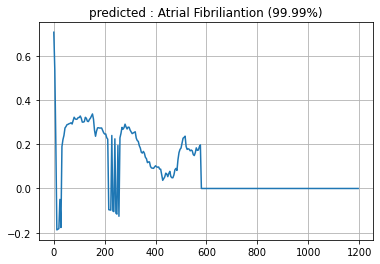

In [17]:
fs = 250
idx = 400

XX = np.array([X_data[idx]])
result = predict_class(cnn_model, XX)
print(result)
tm = np.arange(len(X_data[idx]))/fs*1000
plt.plot(tm, X_data[idx])
plt.title("predicted : %s (%.2f%%)" % (result[1], result[2]*100))
plt.grid()
plt.show()

In [26]:

f_poly = signal.resample_poly(X_data[idx], 1, 5)

In [32]:
f_poly.shape

(60, 1)

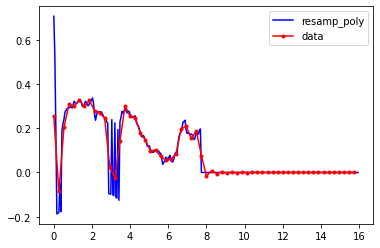

In [31]:
x = np.linspace(0, 16, 300, endpoint=False)
newx = np.linspace(0, 16, 60, endpoint=False)
plt.plot(x, X_data[idx], 'b-')
plt.plot(newx, f_poly, 'r.-')

plt.legend(['resamp_poly', 'data'], loc='best')
plt.show()

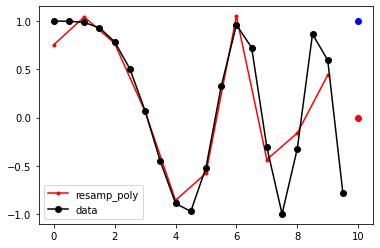

In [11]:
from scipy import signal

x = np.linspace(0, 10, 20, endpoint=False)
y = np.cos(-x**2/6.0)
f_poly = signal.resample_poly(y, 1, 2)
xnew = np.linspace(0, 10, 10, endpoint=False)

import matplotlib.pyplot as plt
plt.plot(xnew, f_poly, 'r.-')
plt.plot(x, y, 'ko-')
plt.plot(10, y[0], 'bo', 10, 0., 'ro')  # boundaries
plt.legend(['resamp_poly', 'data'], loc='best')
plt.show()